In [1]:
import pandas as pd
from surprise import Dataset
from surprise import Reader

import matplotlib.pyplot as plt

a.	Read data from “ratings small.csv” with line format: 'userID movieID rating timestamp'.

In [2]:
file_path = 'ratings_small.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation (10 points)

In [3]:
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy

pmf = SVD()
pmf_cv_results = cross_validate(pmf, data, cv=5, measures=['MAE', 'RMSE'], verbose=True)




Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6883  0.6915  0.6853  0.6918  0.6925  0.6899  0.0027  
RMSE (testset)    0.8945  0.8991  0.8890  0.8971  0.9009  0.8961  0.0042  
Fit time          1.70    1.57    1.67    1.65    1.50    1.62    0.07    
Test time         0.28    0.46    0.18    0.26    0.29    0.29    0.09    


In [4]:
user_cf = KNNBasic(sim_options={'user_based': True})
user_cf_cv_results = cross_validate(user_cf, data, cv=5, measures=['MAE', 'RMSE'], verbose=True)



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7427  0.7441  0.7360  0.7491  0.7459  0.7436  0.0043  
RMSE (testset)    0.9698  0.9653  0.9533  0.9753  0.9712  0.9670  0.0075  
Fit time          0.51    0.45    0.39    0.44    0.33    0.42    0.06    
Test time         2.55    2.22    2.55    2.07    2.64    2.40    0.22    


In [5]:

item_cf = KNNBasic(sim_options={'user_based': False}, verbose=True)
item_cf_cv_results = cross_validate(item_cf, data, cv=5, measures=['MAE', 'RMSE'], verbose=True)



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7257  0.7176  0.7189  0.7214  0.7197  0.7207  0.0028  
RMSE (testset)    0.9402  0.9301  0.9349  0.9346  0.9334  0.9346  0.0033  
Fit time          5.77    5.74    5.01    5.41    5.33    5.45    0.28    
Test time         10.91   10.65   11.28   10.92   9.34    10.62   0.67    


In [6]:
pmf_mae_avg = pmf_cv_results['test_mae'].mean()
pmf_rmse_avg = pmf_cv_results['test_rmse'].mean()

user_cf_mae_avg = user_cf_cv_results['test_mae'].mean()
user_cf_rmse_avg = user_cf_cv_results['test_rmse'].mean()

item_cf_mae_avg = item_cf_cv_results['test_mae'].mean()
item_cf_rmse_avg = item_cf_cv_results['test_rmse'].mean()

In [7]:
print(f'PMF - Average MAE: {pmf_mae_avg.round(3)}, Average RMSE: {pmf_rmse_avg.round(3)}')
print(f'User-based CF - Average MAE: {user_cf_mae_avg.round(3)}, Average RMSE: {user_cf_rmse_avg.round(3)}')
print(f'Item-based CF - Average MAE: {item_cf_mae_avg.round(3)}, Average RMSE: {item_cf_rmse_avg.round(3)}')

PMF - Average MAE: 0.69, Average RMSE: 0.896
User-based CF - Average MAE: 0.744, Average RMSE: 0.967
Item-based CF - Average MAE: 0.721, Average RMSE: 0.935


In [8]:
if user_cf_rmse_avg < item_cf_rmse_avg and user_cf_mae_avg < item_cf_mae_avg:
    print('User-based Collaborative Filtering shows better performance.')
elif item_cf_rmse_avg < user_cf_rmse_avg and item_cf_mae_avg < user_cf_mae_avg:
    print('Item-based Collaborative Filtering shows better performance.')
else:
    print('PMF shows better performance.')


Item-based Collaborative Filtering shows better performance.


e.	Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering? (10 points)

In [9]:
similarity_metrics = ['cosine', 'msd', 'pearson']

def evaluate_similarity_metrics(metrics, algorithm, data):
    results = {'MAE': [], 'RMSE': []}
    for metric in metrics:
        algo = algorithm(sim_options={'name': metric}, verbose=False)
        cv_results = cross_validate(algo, data, cv=5, measures=['MAE', 'RMSE'], verbose=False)
        results['MAE'].append(cv_results['test_mae'].mean())
        results['RMSE'].append(cv_results['test_rmse'].mean())
    return results

In [10]:

user_cf_results = evaluate_similarity_metrics(similarity_metrics, KNNBasic, data)


item_cf_results = evaluate_similarity_metrics(similarity_metrics, KNNBasic, data)


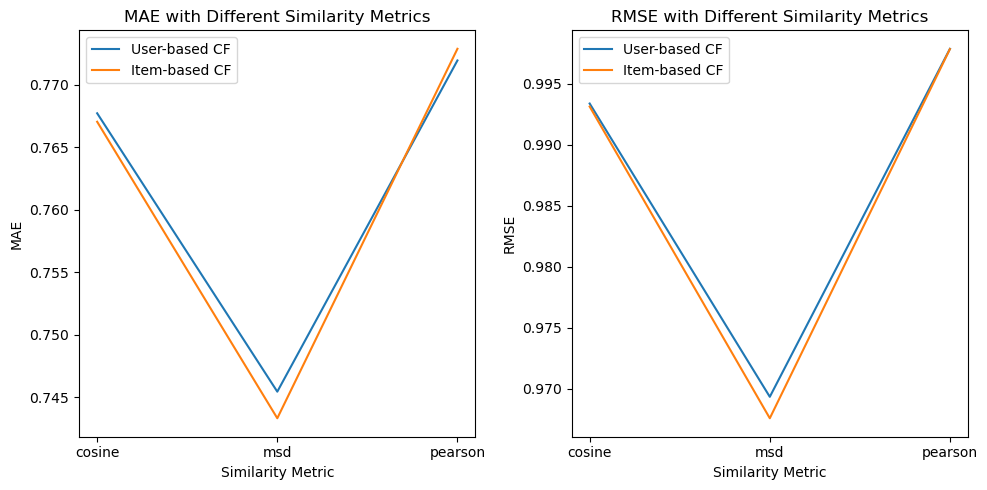

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(similarity_metrics, user_cf_results['MAE'], label='User-based CF')
plt.plot(similarity_metrics, item_cf_results['MAE'], label='Item-based CF')
plt.title('MAE with Different Similarity Metrics')
plt.xlabel('Similarity Metric')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(similarity_metrics, user_cf_results['RMSE'], label='User-based CF')
plt.plot(similarity_metrics, item_cf_results['RMSE'], label='Item-based CF')
plt.title('RMSE with Different Similarity Metrics')
plt.xlabel('Similarity Metric')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
def evaluate_neighbors(neighbors_range, algorithm, data):
    results = {'MAE': [], 'RMSE': []}
    for k in neighbors_range:
        algo = algorithm(k=k, verbose=False)
        cv_results = cross_validate(algo, data, cv=5, measures=['MAE', 'RMSE'], verbose=False)
        results['MAE'].append(cv_results['test_mae'].mean())
        results['RMSE'].append(cv_results['test_rmse'].mean())
    return results

In [13]:
neighbors_range = [5, 10, 15, 20, 25]

user_cf_neighbors_results = evaluate_neighbors(neighbors_range, KNNBasic, data)

item_cf_neighbors_results = evaluate_neighbors(neighbors_range, KNNBasic, data)


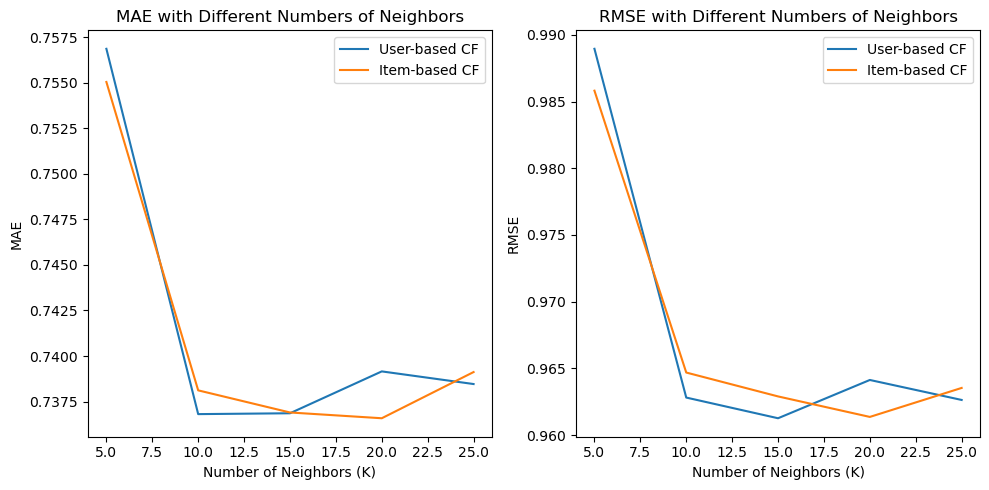

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(neighbors_range, user_cf_neighbors_results['MAE'], label='User-based CF')
plt.plot(neighbors_range, item_cf_neighbors_results['MAE'], label='Item-based CF')
plt.title('MAE with Different Numbers of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(neighbors_range, user_cf_neighbors_results['RMSE'], label='User-based CF')
plt.plot(neighbors_range, item_cf_neighbors_results['RMSE'], label='Item-based CF')
plt.title('RMSE with Different Numbers of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
def find_best_k(algorithm, data):
    best_k_values = {'MAE': None, 'RMSE': None, 'min_rmse': float('inf')}
    for k in neighbors_range:
        algo = algorithm(k=k , verbose=False)
        cv_results = cross_validate(algo, data, cv=5, measures=['MAE', 'RMSE'], verbose=False)
        avg_rmse = cv_results['test_rmse'].mean()
        if avg_rmse < best_k_values['min_rmse']:
            best_k_values['MAE'] = cv_results['test_mae'].mean()
            best_k_values['RMSE'] = avg_rmse
            best_k_values['min_rmse'] = avg_rmse
            best_k_values['best_k'] = k
    return best_k_values

In [16]:
best_k_user_cf = find_best_k(KNNBasic, data)


best_k_item_cf = find_best_k(KNNBasic, data)

print(f'Best K for User-based Collaborative Filtering: {best_k_user_cf["best_k"]} (RMSE: {best_k_user_cf["RMSE"].round(3)}, MAE: {best_k_user_cf["MAE"].round(3)})')
print(f'Best K for Item-based Collaborative Filtering: {best_k_item_cf["best_k"]} (RMSE: {best_k_item_cf["RMSE"].round(3)}, MAE: {best_k_item_cf["MAE"].round(3)})')


Best K for User-based Collaborative Filtering: 15 (RMSE: 0.962, MAE: 0.736)
Best K for Item-based Collaborative Filtering: 20 (RMSE: 0.962, MAE: 0.737)
